In [ ]:
One time step ERA 5

In [4]:
import xarray as xr
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import datetime

AttributeError: module 'geopandas' has no attribute 'plotting'

In [5]:

# Load data
file = '/data/era-interim/era_interim_monthly_197901_201512_upscaled.nc_ann'
ds = xr.open_dataset(file)

ds = ds.assign_coords(lon=((ds.lon + 180) % 360) - 180)

lat = ds.lat
lon = ds.lon

output_era = {}
vars = ['wspd10']

# Define bounding box
lat_min, lat_max = 30, 40
lon_min, lon_max = -90, -70

# Find indices within the bounding box
lat_idx = np.where((lat >= lat_min) & (lat <= lat_max))[0]
lon_idx = np.where((lon >= lon_min) & (lon <= lon_max))[0]

# # Subset the data
for var in vars:
    if var in ds.variables:
        output_era[var] = ds[var][:, lat_idx[0]:lat_idx[-1]+1, lon_idx[0]:lon_idx[-1]+1]

output_era["dates"] = ds['time']
# decoded_times = times.dt  # Access time properties

# # Add dates to a new variable or use directly
# ds['dates'] = decoded_times

ds.close()

import pandas as pd

# Extract time coordinate as pandas datetime objects
dates_era = pd.to_datetime(output_era["dates"].values)

# Define the filtering range
start_date = datetime.datetime(1980, 1, 1)
end_date = datetime.datetime(2018, 1, 31)

# Apply the date filter
m_era = (dates_era >= start_date)& (dates_era <= end_date)

# Filtered dates (optional: store back in output_era if needed)
filtered_dates = dates_era[m_era]

AttributeError: 'EntryPoints' object has no attribute 'get'

In [11]:
print(output_era["wspd10"])

<xarray.DataArray 'wspd10' (time: 37, lat: 10, lon: 16)>
array([[[3.535101, 3.788974, ..., 6.40852 , 6.401814],
        [2.695426, 2.678524, ..., 6.650583, 6.655698],
        ...,
        [3.624588, 3.680243, ..., 7.228336, 7.37412 ],
        [3.917749, 3.979018, ..., 7.204559, 7.308338]],

       [[3.392675, 3.648205, ..., 6.636065, 6.595794],
        [2.561105, 2.543449, ..., 7.052093, 7.011689],
        ...,
        [3.580439, 3.640105, ..., 7.601759, 7.826365],
        [3.86027 , 3.923925, ..., 7.602716, 7.821106]],

       ...,

       [[3.155671, 3.405415, ..., 6.13608 , 6.060438],
        [2.557766, 2.524262, ..., 6.381375, 6.249549],
        ...,
        [3.581743, 3.64977 , ..., 7.60244 , 7.912533],
        [3.933095, 4.008154, ..., 7.346227, 7.6771  ]],

       [[3.201868, 3.529216, ..., 6.514022, 6.442994],
        [2.588353, 2.586043, ..., 6.816088, 6.718678],
        ...,
        [3.434315, 3.49648 , ..., 7.444544, 7.730857],
        [3.79216 , 3.859092, ..., 7.265845, 7.5

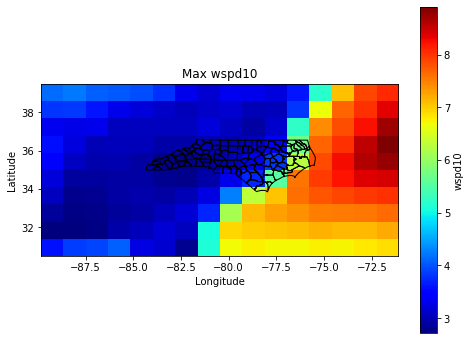

In [9]:
# info = {
#     #'cape': {'cmap': 'terrain', 'title': "Convective Available Potential Energy (J/kg)"},
#     #'tau_x': {'cmap': 'RdBu_r', 'title': "Surface Zonal Wind Stress (dPa)"},
#     #'tau_y': {'cmap': 'Blues', 'title': 'Surface Meridional Wind Stress (dPa)'},
#     'wspd10': {'cmap': 'jet', 'title': 'Wind Speed at 10m (m/s)'}
# }

# Load the shapefile
shapefile_path = "/data/HW/HW2/NCDOT_County_Boundaries.shp"
counties = gpd.read_file(shapefile_path)
counties = counties.to_crs(epsg=4326)
var = 'wspd10'

# Calculate the mean over the desired axis (e.g., time axis)
data_to_plot = np.max(output_era[var], axis=0)

# Define the extent for the plot using lon and lat
lon_min, lon_max = np.min(lon[lon_idx]), np.max(lon[lon_idx])
lat_min, lat_max = np.min(lat[lat_idx]), np.max(lat[lat_idx])

# Plot using imshow
plt.figure(figsize=(8, 6))

plt.imshow(
    data_to_plot,
    cmap=plt.get_cmap(info[var]['cmap']),
    extent=[lon_min, lon_max, lat_min, lat_max],
    origin='lower',  # Ensure the origin is at the bottom-left
)

counties.boundary.plot(ax=plt.gca(), color='black', linewidth=1) #add the mess grid as the x and Y
plt.colorbar(label=var)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title(f'Max {var}')

plt.show()

Convert to tif

In [12]:
print(data_to_plot)

<xarray.DataArray 'wspd10' (lat: 10, lon: 16)>
array([[3.598855, 3.862967, 3.92294 , 4.075873, 3.265246, 3.171868, 2.82649 ,
        5.113911, 6.704629, 6.774958, 6.728316, 6.719275, 6.762216, 6.74546 ,
        6.807871, 6.885127],
       [2.737111, 2.718624, 2.76637 , 2.951283, 3.052893, 3.183759, 3.067838,
        5.080922, 6.947204, 7.004352, 7.059196, 7.09816 , 7.180694, 7.135866,
        7.128556, 7.223405],
       [2.875902, 2.766701, 2.78617 , 2.878279, 2.930864, 3.050323, 3.197437,
        3.728225, 6.134005, 7.131152, 7.308387, 7.406579, 7.510827, 7.54168 ,
        7.558488, 7.642363],
       [3.057362, 2.800315, 2.825607, 2.912264, 2.967352, 2.918197, 3.009767,
        3.251503, 4.28264 , 6.308271, 7.069452, 7.613979, 7.786444, 7.88047 ,
        7.969088, 8.034336],
       [3.220496, 2.904313, 2.897839, 2.933038, 2.934284, 2.827787, 2.807544,
        2.949406, 3.311417, 3.720149, 5.544251, 7.598541, 7.964746, 8.224618,
        8.378181, 8.447142],
       [3.490694, 3.09648 , 

Make Bar graph

In [ ]:
import rioxarray

In [16]:
data_to_plot = data_to_plot.rio.set_spatial_dims(x_dim="lon", y_dim="lat")  # Set spatial dims
data_to_plot = data_to_plot.rio.write_crs("EPSG:4326")  # Add CRS information

output_tif_path = "wind_speed.tif"
data_to_plot.rio.to_raster(output_tif_path)

print(f"GeoTIFF saved to {output_tif_path}")

GeoTIFF saved to wind_speed.tif


In [4]:
import rasterio
# Load the elevation data (GeoTIFF)
wind_file = './wind_speed.tif'
with rasterio.open(wind_file) as src:
    wind_data = src.read(1)  # Read the elevation band
    wind_transform = src.transform
    wind_crs = src.crs

# Ensure the counties and elevation CRS match (both should be EPSG:4326)
print(wind_crs)
shapefile_path = "/data/HW/HW2/NCDOT_County_Boundaries.shp"
counties = gpd.read_file(shapefile_path)
counties_reprojected = counties.to_crs(epsg=4326)

EPSG:4326


NameError: name 'gpd' is not defined

In [44]:
from rasterio.features import geometry_mask

# Function to calculate statistics for a given county
def calculate_stats(county, src, transform):
    # Mask the elevation data using the county polygon
    geometry = [county['geometry']]
    out_image, out_transform = rasterio.mask.mask(src, geometry, crop=True)
    
    # Remove masked NoData values (-99999)
    masked_data = np.ma.masked_equal(out_image, -99999)
    
    # Calculate mean, standard deviation, and coefficient of variation
    mean_wind = np.mean(masked_data)
    max_wind = np.max(masked_data)
    std_wind = np.std(masked_data)
   # cv_wind = std_wind / mean_wind if mean_wind != 0 else 0
    
    return mean_wind, max_wind, std_wind

# Open the wind file and compute statistics for each county
with rasterio.open(wind_file) as src:
    results = []
    for idx, county in counties_reprojected.iterrows():
        mean_wind, std_wind, max_wind = calculate_stats(county, src, wind_transform)
        results.append({
            'County': county['CountyName'],
            'Mean Wind': mean_wind,
            'Max Wind': max_wind,
            'Std Wind': std_wind
           # 'CV Wind': cv_wind
        })

results_gdf = gpd.GeoDataFrame(results)
print(results_gdf)

         County  Max Wind  Mean Wind  Std Wind
0        Camden       0.0   0.000000  0.000000
1         Gates       0.0   0.000000  0.000000
2       Iredell       0.0   0.000000  0.000000
3        Wilkes       0.0   0.000000  0.000000
4         Union       0.0   0.000000  0.000000
5      Cabarrus       0.0   0.000000  0.000000
6          Wake       0.0   0.000000  0.000000
7      Franklin       0.0   0.000000  0.000000
8        Pender       0.0   0.000000  0.000000
9   New Hanover       0.0   0.000000  0.000000
10       Durham       0.0   0.000000  0.000000
11       Orange       0.0   0.000000  0.000000
12      Chatham       0.0   0.000000  0.000000
13     Alamance       0.0   0.000000  0.000000
14      Harnett       0.0   0.000000  0.000000
15        Moore       0.0   0.000000  0.000000
16     Beaufort       0.0   0.000000  0.000000
17       Martin       0.0   0.000000  0.000000
18         Pitt       0.0   3.827486  3.827486
19       Greene       0.0   0.000000  0.000000
20       Wils

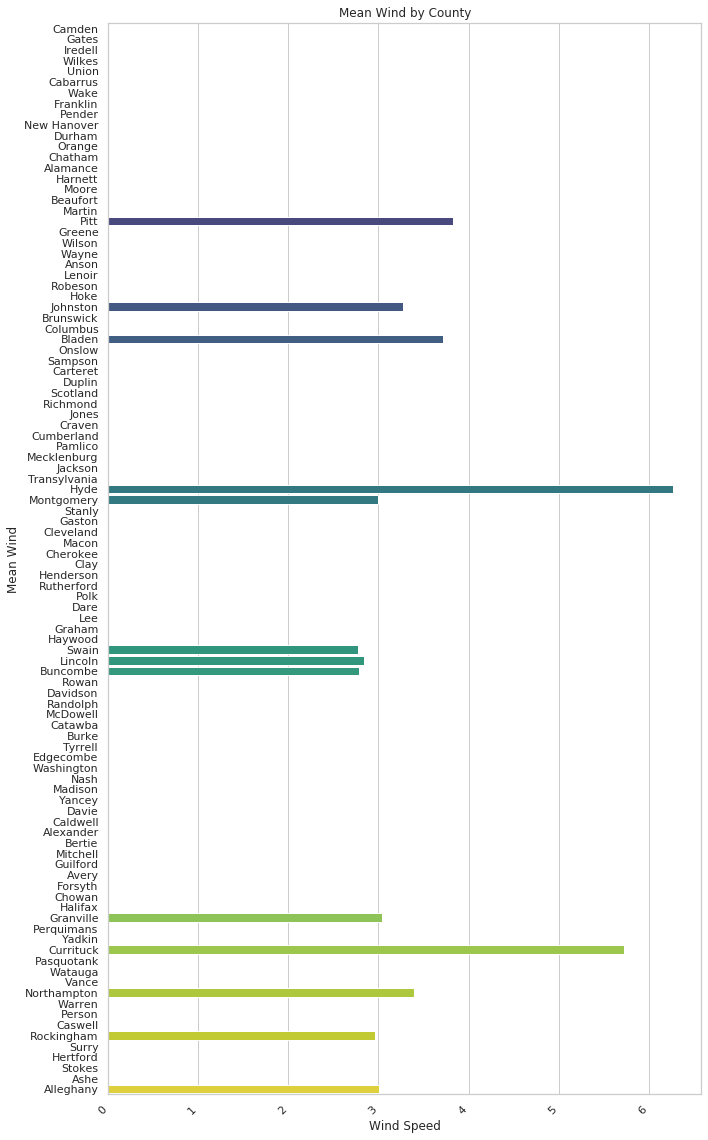

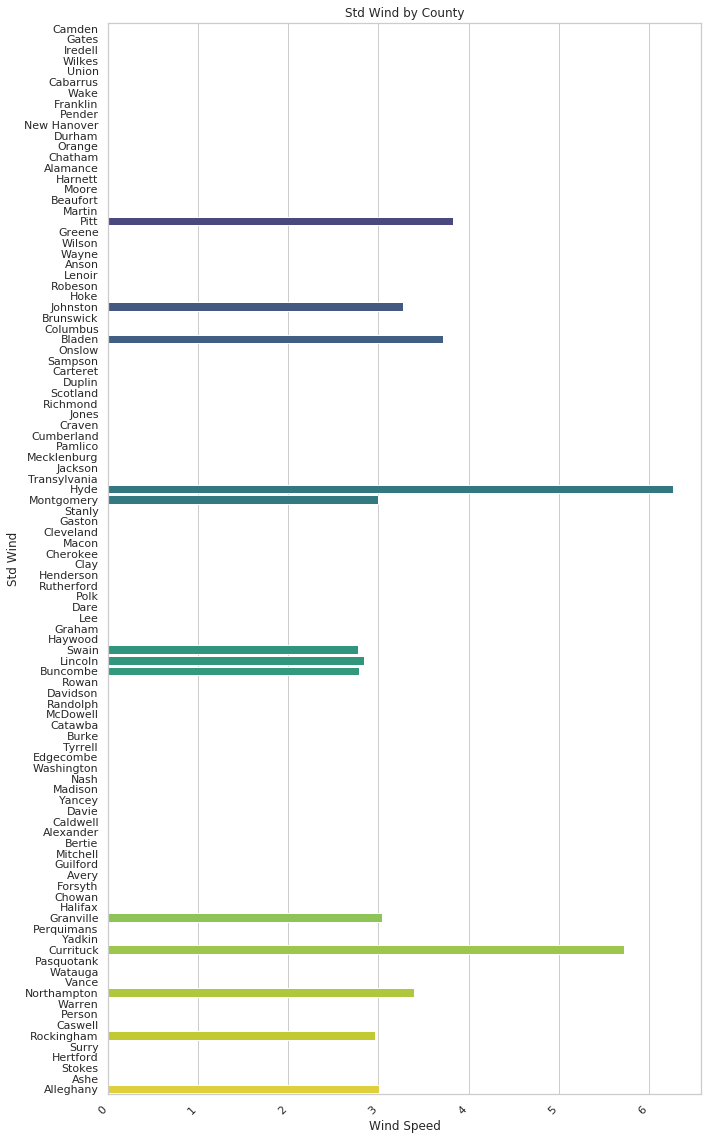

In [43]:
import seaborn as sns
#Once this database is assembled, use bar plots to show the results across all the counties (one bar plot per statistic). Explain the results. 
# Set up the plot style
sns.set(style="whitegrid")

# Define the columns you want to plot
stat_columns = [ 'Mean Wind', 'Std Wind']

# Loop through each statistic and create a barplot
for stat in stat_columns:
    plt.figure(figsize=(10, 16))  # Set figure size
    sns.barplot(x=stat, y='County', data=results_gdf, palette="viridis")
    
    # Set the title and labels
    plt.title(f'{stat} by County')
    plt.xlabel('Wind Speed')
    plt.ylabel(stat)
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha='right')
    
    # Show the plot
    plt.tight_layout()
    plt.show()